# 3. Feature showcase for yabadaba

This gives examples of other features from yabadaba as demonstrated by downstream packages.

## Example #1: dbliquid

The dbliquid package is set up similar to yabadaba_demo in that it adds records directly to yabadaba.  It, however, has real records related to liquid structure data.

In [1]:
import yabadaba

#import sys
#sys.path.append('/home/lmh1/Python-packages/dbliquid')
import dbliquid

import matplotlib.pyplot as plt

database = yabadaba.load_database(style='local', host='/home/lmh1/dbliquid_data')

yabadaba.recordmanager.check_styles()

Record styles that passed import:
- rdf: <class 'dbliquid.record.RDF.RDF'>
- structure_factor: <class 'dbliquid.record.StructureFactor.StructureFactor'>
- partial_structure_factor: <class 'dbliquid.record.PartialStructureFactor.PartialStructureFactor'>
- md_liquid_properties: <class 'dbliquid.record.MDLiquidProperties.MDLiquidProperties'>
Record styles that failed import:



count_records returns a count of matching records.  This is faster than get_records for cdcs and mongo Database styles, and is faster for local databases as long as no query terms are given. 

In [21]:
database.count_records('rdf')

23590

In [26]:
records, df = database.get_records('rdf', element='Zn', source='Waseda', return_df=True)
df

,name,key,id,source,relax_liquid_key,element,T (K),density (angstrom^-3)
0,5e209085-4cc1-495c-a8f2-777b79cdd856,5e209085-4cc1-495c-a8f2-777b79cdd856,Zn--723.15--exp--Waseda-Appendix-8-16,"Y. Waseda, ""The Structure of Non-Crystalline M...",NaN,Zn,723.15,0.0637
1,b0b3c7a5-35c3-4358-944a-4ba345229d92,b0b3c7a5-35c3-4358-944a-4ba345229d92,Zn--933.15--exp--Waseda-Appendix-8-16,"Y. Waseda, ""The Structure of Non-Crystalline M...",NaN,Zn,933.15,0.0619
2,b1260a49-ea70-4d4c-b990-32bf4b7c871f,b1260a49-ea70-4d4c-b990-32bf4b7c871f,Zn--833.15--exp--Waseda-Appendix-8-16,"Y. Waseda, ""The Structure of Non-Crystalline M...",NaN,Zn,833.15,0.0628


The RDF class has multiple yabadaba Value terms, including some that are array values. These are read in from the record model contents but are not included in the metadata.

In [27]:
records[0].g

array([-0.058, -0.052,  0.123,  0.516,  1.213,  1.949,  2.404,  2.418,
        2.088,  1.652,  1.308,  1.084,  0.932,  0.831,  0.758,  0.707,
        0.681,  0.667,  0.678,  0.694,  0.736,  0.788,  0.847,  0.922,
        1.005,  1.087,  1.162,  1.219,  1.244,  1.238,  1.21 ,  1.173,
        1.135,  1.089,  1.034,  0.974,  0.922,  0.888,  0.871,  0.864,
        0.863,  0.868,  0.886,  0.917,  0.955,  0.992,  1.024,  1.05 ,
        1.071,  1.086,  1.093,  1.092,  1.083,  1.068,  1.049,  1.026,
        1.004,  0.983,  0.966,  0.952,  0.941,  0.933,  0.933,  0.941,
        0.956,  0.973,  0.989,  1.005,  1.02 ,  1.033,  1.042,  1.044,
        1.031,  1.015,  0.994,  0.977,  0.969,  0.97 ,  0.984,  1.001,
        1.016,  1.025,  1.022,  1.013,  1.002,  0.99 ,  0.984,  0.984,
        0.988,  0.995,  1.003,  1.011,  1.013,  1.011,  1.005,  0.997,
        0.992,  0.991,  0.991,  0.995])

Plotting across matching records is incredibly easy.

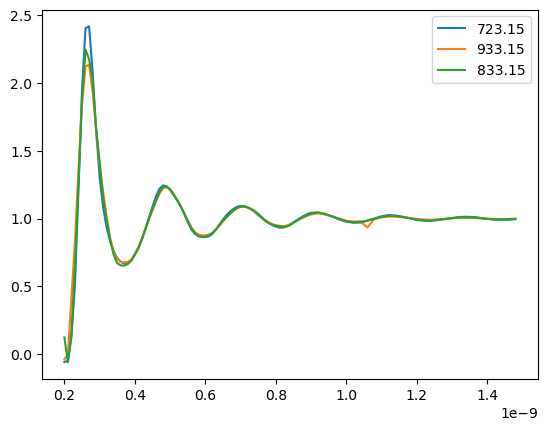

In [28]:
for record in records:
    plt.plot(record.r, record.g, label=record.temperature)
plt.legend()
plt.show()

Knowing your data, your Record classes can also contain additional methods that operate on the data.  For instance, the rdf data can be transformed into a different representation using the integrand() method.

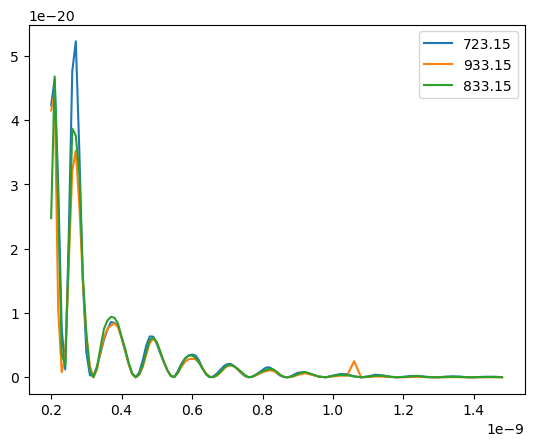

In [29]:
for record in records:
    plt.plot(record.r, record.integrand(), label=record.temperature)
plt.legend()
plt.show()

## Example #2: Interacting with iprPy records

This section showcases yabadaba features using iprPy records.  For iprPy-specific operations, see the next Notebook for a short advert.

In [3]:
import iprPy

For iprPy, I've already saved numerous database settings under simple names making loading databases very easy.

In [9]:
iprPy.settings.list_databases

['master', 'potentials_local', 'iprhub', 'potentials', 'chips', 'test']

In [4]:
test = iprPy.load_database('test')
print(test)
iprhub = iprPy.load_database('iprhub')
print(iprhub)
remote = iprPy.load_database('potentials')
print(remote)

database style local at /home/lmh1/iprPy_test
database style mongo at localhost:27018.ipr
database style cdcs at https://potentials.nist.gov


Now, let's fetch a calculation results record.

In [11]:
records = iprhub.get_records('calculation_phonon', potential_LAMMPS_id='1986--Foiles-S-M--Au--LAMMPS--ipr1', family='A1--Cu--fcc')
record = records[0]

All calculations have a 'tar' folder associated with them that contains all run files from the calculation.  Base yabadaba also has this feature in that it has the built-in design that any raw non-record files can be stored within a tar.gz file in the database according to the record's name.

Alternatively, files could be stored individually but would require some database-specific scheme to ensure that the names/paths are unique and are known to the record itself.

The Database objects have get_tar, add_tar, update_tar, and delete_tar to modify tar contents associated with a specific record.

If you want to simply access and view the tar contents of a record, you can use the tar attribute of the record.  This will automatically download the tar (if needed) and turn it into a TarFile object.

In [12]:
record.tar.getmembers()

[<TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25' at 0x7f6048df8e80>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/1986--Foiles-S-M--Au--LAMMPS--ipr1' at 0x7f6048df8dc0>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/1986--Foiles-S-M--Au--LAMMPS--ipr1/Au_u3.eam' at 0x7f6048df8f40>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/1986--Foiles-S-M--Au--LAMMPS--ipr1.json' at 0x7f6048df90c0>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/529341.bid' at 0x7f6048df8d00>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/59218ca8-945c-45b4-9f24-1cf74f1fef7e.json' at 0x7f6048df8ac0>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/band.png' at 0x7f6048df8940>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/bulk_modulus.png' at 0x7f6048df8b80>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/calc_phonon.in' at 0x7f6048df8a00>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/disp.dat' at 0x7f6048df9000>,
 <TarInfo '61cc392a-7fb7-461d-9533-6b2bc7d6db25/forces.dump' at 0x7f6049321e40>,
 <TarI

For extra convenience, the record has a get_file method that will extract a file as a File object from the tar, and a display_image method that builds on get_file to load and display an image file.

In [13]:
print(record.get_file('529341.bid').read().decode('UTF-8'))

bid made using id: 529341


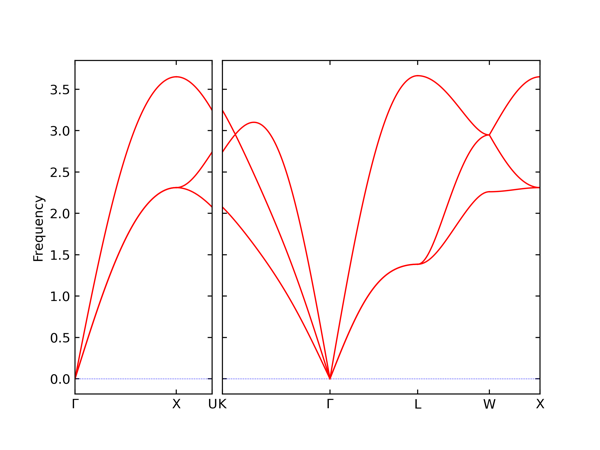

In [14]:
record.display_image('band.png', width=600)